In [1]:
import pandas as pd

df = pd.read_csv("/home/hp/results/HUMAN/distance_analysis_data.csv")
print("Columns in the CSV:", df.columns.tolist())

Columns in the CSV: ['Mutation', 'Mean_dG_star', 'Mean_dG0', 'dG_star_raw', 'dG0_raw', 'Level', 'sec49_distance', 'ca_distance']


In [2]:
# Quick check to count levels in your dataset
import pandas as pd

def check_levels(csv_path):
    """Quick function to check how many levels are in the dataset"""
    df = pd.read_csv(csv_path)
    
    # Clean Level column (same logic as in your main code)
    if 'Level' in df.columns:
        df['Level'] = df['Level'].astype(str)
        
        def extract_level_number(level_str):
            if level_str.startswith('level'):
                return int(level_str.replace('level', ''))
            else:
                try:
                    return int(float(level_str))
                except ValueError:
                    return 0
        
        df['Level'] = df['Level'].apply(extract_level_number)
        
        unique_levels = sorted(df['Level'].unique())
        print(f"Number of unique levels: {len(unique_levels)}")
        print(f"Level range: {min(unique_levels)} to {max(unique_levels)}")
        print(f"All levels: {unique_levels}")
        
        return len(unique_levels), unique_levels
    else:
        print("No 'Level' column found in the dataset")
        return 0, []

# Usage:
csv_path = "/home/hp/results/HUMAN/distance_analysis_data.csv"
num_levels, all_levels = check_levels(csv_path)

Number of unique levels: 20
Level range: 0 to 19
All levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]


Creating HUMAN plots B and C with position-based coloring...
Loaded 273 rows from CSV
Columns: ['Mutation', 'Mean_dG_star', 'Mean_dG0', 'dG_star_raw', 'dG0_raw', 'Level', 'sec49_distance', 'ca_distance']
Original Level values: ['level0' 'level1' 'level2' 'level3' 'level4' 'level5' 'level6' 'level7'
 'level8' 'level9' 'level10' 'level11' 'level12' 'level13' 'level14'
 'level15' 'level16' 'level17' 'level18' 'level19']
Extracted numeric levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
After cleaning: 190 rows remaining
Positions found: [np.int64(3), np.int64(24), np.int64(47), np.int64(48), np.int64(52), np.int64(54), np.int64(60), np.int64(74), np.int64(87), np.int64(99), np.int64(102), np.int64(104), np.int64(107), np.int64(139), np.int64(142), np.int64(143), 

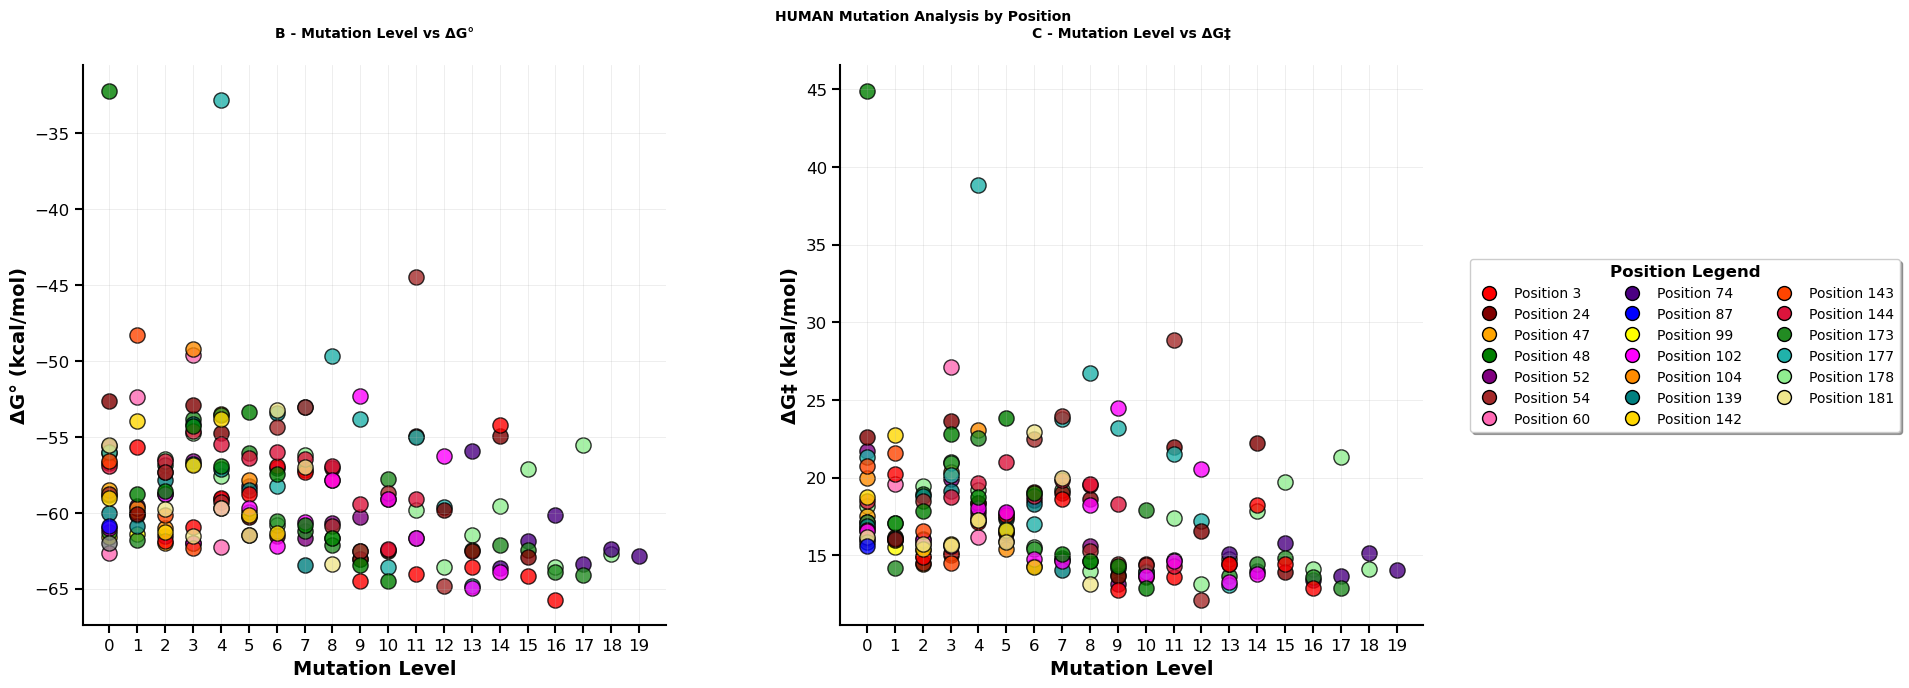


HUMAN POSITION-BASED MUTATION ANALYSIS
Total mutations analyzed: 190
Unique positions found: 21
Levels analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
Positions with defined colors: 20
Extra positions found in data: [np.int64(107)]
Mutations per position:
  Position 3: 16 mutations ✓
  Position 24: 16 mutations ✓
  Position 47: 3 mutations ✓
  Position 48: 11 mutations ✓
  Position 52: 10 mutations ✓
  Position 54: 12 mutations ✓
  Position 60: 4 mutations ✓
  Position 74: 7 mutations ✓
  Position 87: 1 mutations ✓
  Position 99: 2 mutations ✓
  Position 102: 14 mutations ✓
  Position 104: 6 mutations ✓
  Position 107: 1 mutations ✗
  Position 139: 8 mutations ✓
  Position 142: 7 mutations ✓
  Position 143: 4 mutations ✓
  Position 144: 11 mutations ✓
  Po

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import matplotlib.font_manager as fm
from scipy import stats

def normalize_data(data):
    """
    Normalize data to 0-1 range using min-max normalization
    Replaces sklearn's MinMaxScaler
    
    Parameters:
    -----------
    data : numpy.ndarray
        Data to normalize
    
    Returns:
    --------
    numpy.ndarray
        Normalized data with values between 0 and 1
    """
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    
    # Avoid division by zero
    data_range = data_max - data_min
    data_range[data_range == 0] = 1
    
    return (data - data_min) / data_range

def check_arial_font():
    """Check if Arial font is available and provide installation guidance"""
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    arial_variants = ['Arial', 'Arial Unicode MS', 'Arial Black']
    
    arial_available = any(font in available_fonts for font in arial_variants)
    
    if not arial_available:
        return False
    else:
        return True

def setup_plos_style():
    """Configure matplotlib for PLOS ONE journal standards with larger fonts"""
    # Check Arial availability first
    arial_available = check_arial_font()
    
    # Set font family with fallbacks
    if arial_available:
        rcParams['font.family'] = 'Arial'
    else:
        # Use best available alternative
        available_fonts = [f.name for f in fm.fontManager.ttflist]
        fallback_fonts = ['DejaVu Sans', 'Liberation Sans', 'Helvetica', 'sans-serif']
        
        for font in fallback_fonts:
            if font in available_fonts:
                rcParams['font.family'] = font
                break
        else:
            rcParams['font.family'] = 'sans-serif'
    
    # PLOS ONE compliant font sizes
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 14
    rcParams['axes.titlesize'] = 16
    rcParams['xtick.labelsize'] = 12
    rcParams['ytick.labelsize'] = 12
    rcParams['legend.fontsize'] = 10
    rcParams['figure.titlesize'] = 18
    rcParams['axes.linewidth'] = 1.0
    rcParams['xtick.major.width'] = 1.0
    rcParams['ytick.major.width'] = 1.0
    rcParams['xtick.minor.width'] = 0.5
    rcParams['ytick.minor.width'] = 0.5
    rcParams['savefig.dpi'] = 300
    rcParams['savefig.bbox'] = 'tight'
    rcParams['savefig.pad_inches'] = 0.1

def get_position_colors():
    """Define colors for each position based on the HUMAN mutations"""
    # Updated for HUMAN positions: [3, 48, 52, 47, 99, 54, 177, 144, 178, 74, 143, 139, 87, 142, 102, 104, 24, 60, 181, 173]
    position_colors = {
        3: '#FF0000',    # Red (Position 3)
        4: '#00FFFF',    # Cyan (Position 4)
        24: '#800000',   # Maroon (Position 24)
        47: '#FFA500',   # Orange (Position 47)
        48: '#008000',   # Green (Position 48)
        52: '#800080',   # Purple (Position 52)
        54: '#A52A2A',   # Brown (Position 54)
        60: '#FF69B4',   # Hot Pink (Position 60)
        74: '#4B0082',   # Indigo (Position 74)
        87: '#0000FF',   # Blue (Position 87)
        99: '#FFFF00',   # Yellow (Position 99)
        102: '#FF00FF',  # Magenta (Position 102)
        104: '#FF8C00',  # Dark Orange (Position 104)
        139: '#008080',  # Teal (Position 139)
        142: '#FFD700',  # Gold (Position 142)
        143: '#FF4500',  # Orange Red (Position 143)
        144: '#DC143C',  # Crimson (Position 144)
        173: '#228B22',  # Forest Green (Position 173)
        177: '#20B2AA',  # Light Sea Green (Position 177)
        178: '#90EE90',  # Light Green (Position 178)
        181: '#F0E68C'   # Khaki (Position 181)
    }
    return position_colors

def extract_position_from_mutation(mutation):
    """Extract position number from mutation string - Updated for HUMAN format"""
    import re
    
    # Handle HUMAN mutation formats (e.g., C49U, F48Y, T52A, etc.)
    # Try to extract number from mutation string
    numbers = re.findall(r'\d+', str(mutation))
    if numbers:
        return int(numbers[0])
    
    # If no number found, try other patterns
    if 'Position' in str(mutation):
        parts = str(mutation).split('Position')
        if len(parts) > 1:
            nums = re.findall(r'\d+', parts[1])
            if nums:
                return int(nums[0])
    
    return None

def extract_level_number(level_str):
    """Extract numeric level from level string (e.g., 'level0' -> 0)"""
    import re
    
    if pd.isna(level_str):
        return None
    
    # Convert to string if not already
    level_str = str(level_str).lower()
    
    # Extract number from level string
    numbers = re.findall(r'\d+', level_str)
    if numbers:
        return int(numbers[0])
    
    return None

def create_plots_bc_only(csv_path):
    """
    Create only plots B and C with bigger dots and position-based coloring
    
    Parameters:
    -----------
    csv_path : str
        Path to CSV file containing mutation data
    """
    
    # Setup PLOS ONE styling
    setup_plos_style()
    
    # Load and validate data
    try:
        df = pd.read_csv(csv_path)
        print(f"Loaded {len(df)} rows from CSV")
        print(f"Columns: {list(df.columns)}")
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file: {csv_path}")
    
    # Standardize column names
    column_mapping = {
        'Mean_dG_star': 'dg_star',
        'Mean_dG0': 'dg0', 
        'Mutation': 'mutation',
        'mean_dg_star': 'dg_star',
        'mean_dg0': 'dg0'
    }
    
    for old_name, new_name in column_mapping.items():
        if old_name in df.columns:
            df = df.rename(columns={old_name: new_name})
    
    # Validate required columns
    required_cols = {'dg_star', 'dg0', 'mutation', 'Level'}
    missing_cols = required_cols - set(df.columns)
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Clean and sort data - first extract numeric levels
    print(f"Original Level values: {df['Level'].unique()}")
    df['Level_Numeric'] = df['Level'].apply(extract_level_number)
    print(f"Extracted numeric levels: {sorted(df['Level_Numeric'].dropna().unique())}")
    
    # Remove rows with missing critical data
    df_clean = df.dropna(subset=['dg_star', 'dg0', 'mutation', 'Level_Numeric']).copy()
    print(f"After cleaning: {len(df_clean)} rows remaining")
    
    df_sorted = df_clean.sort_values('Level_Numeric').reset_index(drop=True)
    
    # Extract positions from mutations
    df_sorted['Position'] = df_sorted['mutation'].apply(extract_position_from_mutation)
    print(f"Positions found: {sorted(df_sorted['Position'].dropna().unique())}")
    
    # Get position colors
    position_colors = get_position_colors()
    
    # Assign colors based on position
    df_sorted['Color'] = df_sorted['Position'].map(position_colors)
    # Use gray for unknown positions
    df_sorted['Color'] = df_sorted['Color'].fillna('#808080')
    
    # Create figure with 1x2 layout (only B and C)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='white')
    fig.subplots_adjust(left=0.08, right=0.75, bottom=0.15, top=0.85, wspace=0.3)
    
    # Use numeric levels for plotting
    all_levels = sorted(df_sorted['Level_Numeric'].unique())
    print(f"Plotting levels: {all_levels}")
    
    # Plot B: Level vs ΔG° with bigger dots and position colors
    for idx, row in df_sorted.iterrows():
        ax1.scatter(row['Level_Numeric'], row['dg0'], 
                   c=row['Color'], s=120, alpha=0.8,
                   edgecolors='black', linewidth=1.0)
    
    ax1.set_xticks(all_levels)
    ax1.set_xlabel('Mutation Level', fontweight='bold', fontsize=14)
    ax1.set_ylabel('ΔG° (kcal/mol)', fontweight='bold', fontsize=14)
    ax1.set_title('B - Mutation Level vs ΔG°', fontweight='bold', fontsize=10, pad=20)
    ax1.grid(True, alpha=0.3, linewidth=0.5)
    
    # Plot C: Level vs ΔG‡ with bigger dots and position colors
    for idx, row in df_sorted.iterrows():
        ax2.scatter(row['Level_Numeric'], row['dg_star'], 
                   c=row['Color'], s=120, alpha=0.8,
                   edgecolors='black', linewidth=1.0)
    
    ax2.set_xticks(all_levels)
    ax2.set_xlabel('Mutation Level', fontweight='bold', fontsize=14)
    ax2.set_ylabel('ΔG‡ (kcal/mol)', fontweight='bold', fontsize=14)
    ax2.set_title('C - Mutation Level vs ΔG‡', fontweight='bold', fontsize=10, pad=20)
    ax2.grid(True, alpha=0.3, linewidth=0.5)
    
    # Clean up axes - remove top and right spines
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)
        ax.tick_params(axis='both', which='minor', labelsize=10, width=1, length=3)
    
    # Create legend with position colors
    unique_positions = sorted([pos for pos in df_sorted['Position'].unique() if pos is not None])
    legend_elements = []
    
    for pos in unique_positions:
        if pos in position_colors:
            legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                            markerfacecolor=position_colors[pos], 
                                            markersize=10, markeredgecolor='black',
                                            markeredgewidth=1, label=f'Position {pos}'))
    
    # Add legend outside the plot area
    if legend_elements:
        # Split legend into multiple columns if too many positions
        ncol = 3 if len(legend_elements) > 10 else 2
        legend = fig.legend(handles=legend_elements, 
                          bbox_to_anchor=(0.77, 0.5), 
                          loc='center left',
                          ncol=ncol,
                          fontsize=10,
                          title='Position Legend',
                          title_fontsize=12,
                          frameon=True,
                          fancybox=True,
                          shadow=True)
        legend.get_title().set_fontweight('bold')
    
    # Add main figure title
    fig.suptitle('HUMAN Mutation Analysis by Position', 
                 fontsize=10, fontweight='bold', y=0.92)
    
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("HUMAN POSITION-BASED MUTATION ANALYSIS")
    print("="*60)
    print(f"Total mutations analyzed: {len(df_sorted)}")
    print(f"Unique positions found: {len(unique_positions)}")
    print(f"Levels analyzed: {all_levels}")
    print(f"Positions with defined colors: {len([p for p in unique_positions if p in position_colors])}")
    
    # Expected HUMAN positions
    expected_positions = [3, 48, 52, 47, 99, 54, 177, 144, 178, 74, 143, 139, 87, 142, 102, 104, 24, 60, 181, 173]
    missing_from_data = [p for p in expected_positions if p not in unique_positions]
    extra_in_data = [p for p in unique_positions if p not in expected_positions]
    
    if missing_from_data:
        print(f"Expected positions missing from data: {missing_from_data}")
    if extra_in_data:
        print(f"Extra positions found in data: {extra_in_data}")
    
    print(f"Mutations per position:")
    
    position_counts = df_sorted['Position'].value_counts().sort_index()
    for pos, count in position_counts.items():
        if pos is not None:
            color_status = "✓" if pos in position_colors else "✗"
            print(f"  Position {pos}: {count} mutations {color_status}")
    
    # Check if all positions have colors
    positions_without_colors = [p for p in unique_positions if p not in position_colors]
    if positions_without_colors:
        print(f"\nPositions needing color definitions: {positions_without_colors}")
    else:
        print(f"\n✓ All positions have color definitions!")
    
    # Show sample data
    print(f"\nSample of processed data:")
    print(df_sorted[['mutation', 'Position', 'Level_Numeric', 'dg_star', 'dg0']].head(10))
    
    return fig, (ax1, ax2), df_sorted

# Example usage
def main():
    """Main function for plotting only B and C with position coloring"""
    csv_path = "/home/hp/results/HUMAN/distance_analysis_data.csv"
    
    print("Creating HUMAN plots B and C with position-based coloring...")
    
    try:
        fig, axes, df_analysis = create_plots_bc_only(csv_path)
        print("✓ Figure created successfully!")
        print("  - Only plots B and C displayed")
        print("  - Larger dots with position-based colors")
        print("  - Color legend showing all positions")
        print("  - Fixed level extraction for HUMAN data!")
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        print("Please check your CSV file path and column names.")

if __name__ == "__main__":
    main()